In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_csv('./data.csv', encoding='gbk')

### 数据预览

In [42]:
df.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


### 数据维度 4754行，90列

In [43]:
df.shape

(4754, 90)

### 查看列的数据类型分布

In [44]:
df.dtypes.value_counts()

float64    70
int64      13
object      7
dtype: int64

In [45]:
df.select_dtypes(include='object').columns.values

array(['trade_no', 'bank_card_no', 'reg_preference_for_trad', 'source',
       'id_name', 'latest_query_time', 'loans_latest_time'], dtype=object)

In [46]:
df.select_dtypes(include='int64').columns.values

array(['Unnamed: 0', 'custid', 'take_amount_in_later_12_month_highest',
       'repayment_capability', 'is_high_user', 'historical_trans_amount',
       'trans_amount_3_month', 'abs', 'avg_price_last_12_month',
       'max_cumulative_consume_later_1_month',
       'pawns_auctions_trusts_consume_last_1_month',
       'pawns_auctions_trusts_consume_last_6_month', 'status'],
      dtype=object)

In [47]:
df.select_dtypes(include='float64').columns.values

array(['low_volume_percent', 'middle_volume_percent',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'number_of_trans_from_2011', 'first_transaction_time',
       'historical_trans_day', 'rank_trad_1_month',
       'avg_consume_less_12_valid_month', 'top_trans_count_last_1_month',
       'avg_price_top_last_12_valid_month', 'trans_top_time_last_1_month',
       'trans_top_time_last_6_month', 'consume_top_time_last_1_month',
       'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_fail_top_count_enum_last_12_month',
       'consume_mini_time_last_1_month',
       'max_consume_count_later_6_month',
       'railway_consume_count_last_12_month',
       'jewelry_consume_count_last_6_mont

In [48]:
df['first_transaction_time'].head(5)

0    20130817.0
1    20160402.0
2    20170617.0
3    20130516.0
4    20170312.0
Name: first_transaction_time, dtype: float64

### first_transaction_time被pandas识别为float64，后期需要做数据类型转换

### 查看status值的分布情况

In [49]:
df['status'].value_counts()

0    3561
1    1193
Name: status, dtype: int64

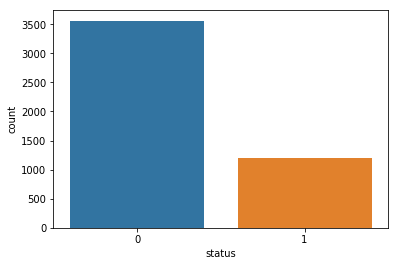

In [50]:
sns.countplot(df['status'])

In [51]:
df.columns

Index(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no',
       'low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_mont

### 删除无关列
#### 怎么确定是和status无关的列呢？是不是要计算相关性才知道呢？这块不知道怎么弄

In [52]:
df.drop(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no'], axis=1, inplace=True)

### 缺失数据处理，主要使用删除法、填补法和插值法
#### 删除法
##### 当数据中的某个变量大部分值都是缺失值，可以考虑删除改变量；当缺失值是随机分布的，且缺失的数量并不是很多是，也可以删除这些缺失的观测。
##### 替补法
##### 对于连续型变量，如果变量的分布近似或就是正态分布的话，可以用均值替代那些缺失值；如果变量是有偏的，可以使用中位数来代替那些缺失值；对于离散型变量，我们一般用众数去替换那些存在缺失的观测。
#### 插补法
##### 插补法是基于蒙特卡洛模拟法，结合线性模型、广义线性模型、决策树等方法计算出来的预测值替换缺失值。

In [53]:
df.isnull().sum()

low_volume_percent                          2
middle_volume_percent                       2
take_amount_in_later_12_month_highest       0
trans_amount_increase_rate_lately           3
trans_activity_month                        2
trans_activity_day                          2
transd_mcc                                  2
trans_days_interval_filter                  8
trans_days_interval                         2
regional_mobility                           2
student_feature                          2998
repayment_capability                        0
is_high_user                                0
number_of_trans_from_2011                   2
first_transaction_time                      2
historical_trans_amount                     0
historical_trans_day                        2
rank_trad_1_month                           2
trans_amount_3_month                        0
avg_consume_less_12_valid_month             2
abs                                         0
top_trans_count_last_1_month      

### 计算缺失率

In [54]:
for feature in df.columns:
    summ = df[feature].isnull().sum()
    if summ:
        print('%.4f'%(summ*100/df.shape[0]), '%',  '--', feature)

0.0421 % -- low_volume_percent
0.0421 % -- middle_volume_percent
0.0631 % -- trans_amount_increase_rate_lately
0.0421 % -- trans_activity_month
0.0421 % -- trans_activity_day
0.0421 % -- transd_mcc
0.1683 % -- trans_days_interval_filter
0.0421 % -- trans_days_interval
0.0421 % -- regional_mobility
63.0627 % -- student_feature
0.0421 % -- number_of_trans_from_2011
0.0421 % -- first_transaction_time
0.0421 % -- historical_trans_day
0.0421 % -- rank_trad_1_month
0.0421 % -- avg_consume_less_12_valid_month
0.0421 % -- top_trans_count_last_1_month
2.1876 % -- avg_price_top_last_12_valid_month
0.0421 % -- reg_preference_for_trad
0.1683 % -- trans_top_time_last_1_month
0.1683 % -- trans_top_time_last_6_month
0.1683 % -- consume_top_time_last_1_month
0.1683 % -- consume_top_time_last_6_month
8.9609 % -- cross_consume_count_last_1_month
0.3366 % -- trans_fail_top_count_enum_last_1_month
0.3366 % -- trans_fail_top_count_enum_last_6_month
0.3366 % -- trans_fail_top_count_enum_last_12_month
0.5469

#### 总记录行数为4754行，如果大多数都缺失，则删除该列，否则使用平均值进行填充
##### 注意：如果使用平均值，则要保证列数据是数值类型

In [55]:
df.drop(['student_feature'], axis=1, inplace=True)

In [56]:
df.describe(include='O')

,reg_preference_for_trad,source,id_name,latest_query_time,loans_latest_time
count,4752,4754,4478,4450,4457
unique,5,1,4309,207,232
top,一线城市,xs,李杰,2018-04-14,2018-05-03
freq,3403,4754,5,423,134


In [57]:
df.drop(['source', 'id_name', 'latest_query_time'], axis=1, inplace=True)

In [66]:
df['loans_latest_time'] = pd.to_datetime(df['loans_latest_time'], format='%Y-%m-%d')

In [75]:
def dt_to_ts(dt):
    try:
        ts = time.mktime(dt.timetuple())
    except:
        ts = np.nan
    return ts
df['loans_latest_time'] = df['loans_latest_time'].apply(dt_to_ts)

In [76]:
dic = {}
for i, val in enumerate(list(df['reg_preference_for_trad'].unique())):
    dic[val] = i
df['reg_preference_for_trad'] = df['reg_preference_for_trad'].map(dic)

In [77]:
for feature in df.columns:
    summ = df[feature].isnull().sum()
    if summ:
        df[feature].fillna(df[feature].mean(), inplace=True)

### 划分X, y

In [78]:
y = df['status']
X = df.drop('status', axis=1)

### 划分数据集

In [79]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2018)